# Keras
### 提出用 バージョン

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers

## 【問題1】公式チュートリアルモデルを分担して実行

TensorFLowの公式チュートリアルモデルを分担して実行してください。

以下の中から1人ひとつ選び実行し、その結果を簡単に発表してください。

**<参考>**
https://www.tensorflow.org/tutorials/keras/classification

In [169]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [170]:
# MNISTのFashionデータ
####訓練用
# print(train_images.shape)  #(60000, 28, 28) 28×28の画像が60,000枚ある
# print(train_labels.shape)  #(60000) 訓練データの画像のラベル(クラス)が10種類ある

####テスト用
# print(test_images.shape)  #(10000, 28, 28)
# print(test_labels.shape)  #(10000)

# ラベル	クラス
#    0	    Tシャツ/トップス
#    1	    ズボン
#    2	    路肩に寄せて下さい
#    3	    ドレス
#    4	    コート
#    5	    サンダル
#    6	    シャツ
#    7	    スニーカー
#    8	    バッグ
#    9	    アンクルブーツ

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# print(train_images)
# print(train_labels)

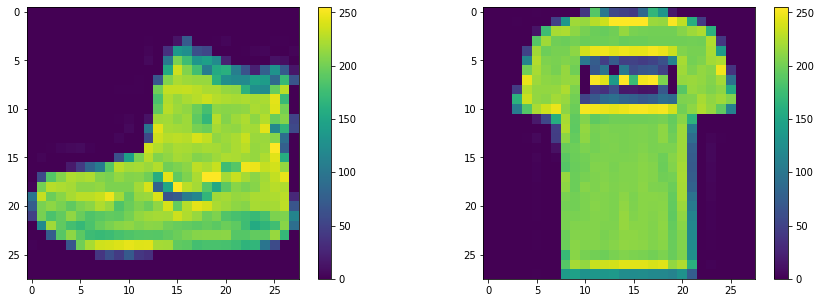

In [171]:
# データの前処理

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

plt.subplot(1, 2, 2)
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [172]:
train_images = train_images / 255.0
test_images = test_images / 255.0
# print(train_images)
# print(train_labels)


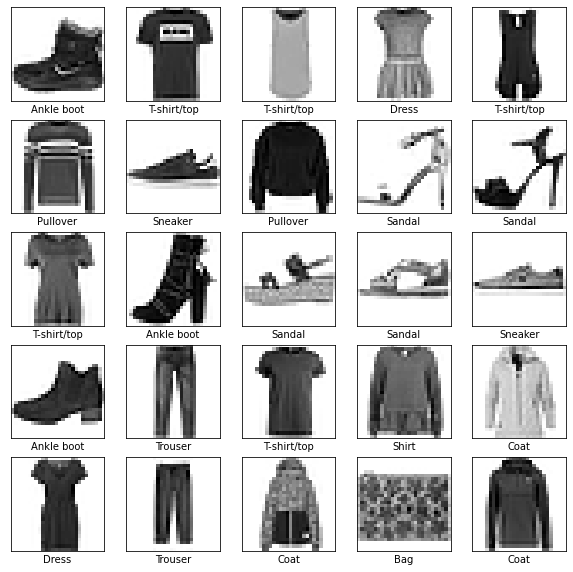

In [173]:
# 繰り返し処理で一括表示
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [174]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#一次元配列に変換
    keras.layers.Dense(128, activation='relu'),#全結合層ニューロン:128個
    keras.layers.Dense(10, activation='softmax')#全結合層ニューロン:10個 出力
])

**モデルのコンパイル**

モデルが訓練できるようになるには、いくつかの設定を追加する必要があります。

それらの設定は、モデルのコンパイル(compile）時に追加されます。

**損失関数（loss function）** 

—訓練中のモデルが不正確であるほど大きな値となる関数です。

この関数の値を最小化することにより、訓練中のモデルを正しい方向に向かわせようというわけです。

**オプティマイザ（optimizer）**

—モデルが見ているデータと、損失関数の値から、

どのようにモデルを更新するかを決定します。

**メトリクス（metrics）**

—訓練とテストのステップを監視するのに使用します。

下記の例ではaccuracy （正解率）、つまり、画像が正しく分類された比率を使用しています。

In [175]:
# accuracy （正解率）
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## モデルの訓練

ニューラルネットワークの訓練には次のようなステップが必要です。

モデルに訓練用データを投入します—この例では train_images と train_labels の２つの配列です。


モデルは、画像とラベルの対応関係を学習します。
モデルにテスト用データセットの予測（分類）を行わせます—この例では test_images 配列です。


その後、予測結果と test_labels 配列を照合します。

訓練を開始するには、model.fit メソッドを呼び出します。モデルを訓練用データに "fit"（適合）させるという意味です。




In [176]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4963 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3720 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8861
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2950 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2800 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2680 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

正解率の評価


次に、テスト用データセットに対するモデルの性能を比較します。

In [177]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

# Train accuracy: 0.9237
# Test accuracy: 0.8902000188827515
# 若干過学習だがほぼ同じ

313/313 - 0s - loss: 0.3430 - accuracy: 0.8821

Test accuracy: 0.882099986076355


In [178]:
predictions = model.predict(test_images)

# 1つ目のデータの推定結果
print(f'予測結果 : \n{predictions[0]}')
print(f'一番可能性の高いラベル : \n{np.argmax(predictions[0])}')
print(f'答え : \n{test_labels[0]}')

予測結果 : 
[5.3221011e-06 1.6004934e-08 3.2590566e-09 2.3887650e-09 4.1990072e-07
 1.3778183e-04 7.3025030e-06 1.6341368e-02 3.2244839e-07 9.8350739e-01]
一番可能性の高いラベル : 
9
答え : 
9


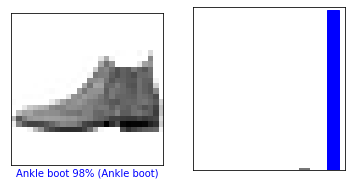

In [179]:
# 10チャンネルすべてをグラフ化してみる。
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# 0番目の画像と、予測、予測配列可視化。
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# 
# 青字が正解ラベル（9）、赤字が予測ラベル（1）
# 

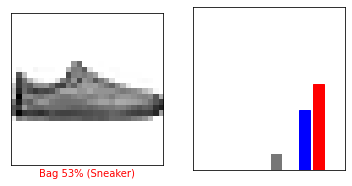

In [180]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

# 
# 青字が正解ラベル（7）、赤字が予測ラベル（1）
# 

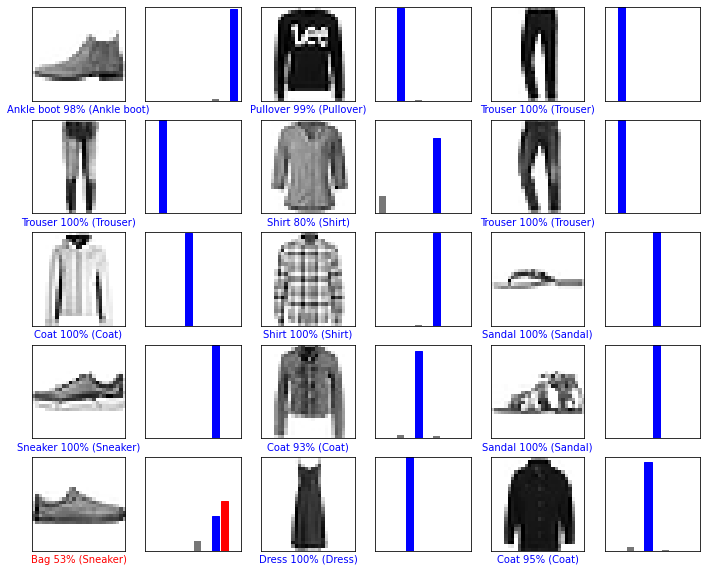

In [181]:
# X個のテスト画像、予測されたラベル、正解ラベル
# 正しい予測は青で、間違った予測は赤で表示
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# 予測の中のいくつかの画像を、予測値とともに表示してみましょう。
# 画像下にパーセント（100分率）を示します。
# 自信がある数字でも間違っていることがある

In [182]:
# 訓練済みのモデルを使って1枚の画像に対する予測
# テスト用データセットから画像を1枚取り出す
img = test_images[0]
print(img.shape)#(28, 28)

# tf.keras モデルは、サンプルの中のバッチか「集まり」について予測を行うように作られている
# そのため、1枚の画像を使う場合でも、リスト化する必要がある

# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))
print(img.shape)#(1, 28, 28)

predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[5.3221011e-06 1.6004964e-08 3.2590566e-09 2.3887787e-09 4.1990111e-07
  1.3778183e-04 7.3025030e-06 1.6341368e-02 3.2244898e-07 9.8350739e-01]]


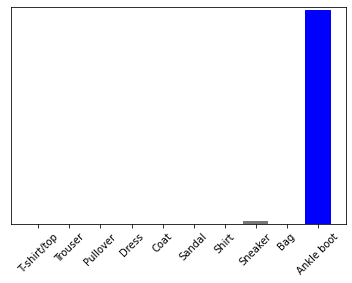

In [183]:
# 上記の可視化
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [184]:
print(f'予測した結果 : {np.argmax(predictions_single[0])}')

予測した結果 : 9


## 結果

公式のチュートリアルをもとに実行したが、かなり簡単に実行できた。

エポック５で実行した場合はtestもTrainも大きな差がなく、良い推定が得られた。

エポック１０に増やしたところ、Trainデータの正解率が大きく上昇したが、過学習が起きた。

学習数など、ハイパーパラメーターの選定も重要と改めて実感した。

--------------------------------------





「Sprint13 TensorFlow」で作成した4種類のデータセットを扱うTensorFLowのコードを異なるフレームワークに変更していきます。


**Iris（Iris-versicolorとIris-virginicaのみの2値分類）**

**Iris（3種類すべての目的変数を使用して多値分類）**

**House Prices**

**MNIST**

#### Kerasへの書き換え

KerasはTensorFLowに含まれるtf.kerasモジュールを使用してください。


KerasにはSequentialモデルかFunctional APIかなど書き方に種類がありますが、これは指定しません。

## 【問題3】Iris（2値分類）をKerasで学習

TensorFlowによるIrisデータセットに対する2値分類をKerasに書き換えてください。

<参照>https://www.tensorflow.org/tutorials/keras/text_classification

In [185]:
from sklearn.datasets import load_iris

data = load_iris()

x_df = pd.DataFrame(data.data)
y_df = pd.DataFrame(data.target)

d = pd.concat([x_df, y_df], axis=1)
d.columns=['sepal_length', 'sepal_width', 'petal_length','petal_width','Species']

# 二値分類へ
d = d[(d["Species"] == 1)|(d["Species"] == 2)].reset_index(drop=True)
display(d.head())
display(d.shape)

y = d["Species"]
x = d.loc[:, ['sepal_length', 'sepal_width', 'petal_length','petal_width']]

x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.3, random_state=42)
_, x_val, _, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1


(100, 5)

In [186]:
model = keras.Sequential()
model.add(keras.layers.Embedding(100, 4))#100行,4列を想定（正しい入力について要チェック）
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 4)           400       
_________________________________________________________________
global_average_pooling1d_9 ( (None, 4)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [187]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=50,
                    batch_size=30,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/50
3/3 [==============================] - 1s 105ms/step - loss: 0.6840 - accuracy: 0.4714 - val_loss: 0.6753 - val_accuracy: 0.5714
Epoch 2/50
3/3 [==============================] - 0s 32ms/step - loss: 0.6693 - accuracy: 0.4714 - val_loss: 0.6625 - val_accuracy: 0.5714
Epoch 3/50
3/3 [==============================] - 0s 17ms/step - loss: 0.6553 - accuracy: 0.4714 - val_loss: 0.6494 - val_accuracy: 0.5714
Epoch 4/50
3/3 [==============================] - 0s 18ms/step - loss: 0.6408 - accuracy: 0.4714 - val_loss: 0.6362 - val_accuracy: 0.5714
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6256 - accuracy: 0.4714 - val_loss: 0.6224 - val_accuracy: 0.5714
Epoch 6/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6099 - accuracy: 0.4714 - val_loss: 0.6076 - val_accuracy: 0.5714
Epoch 7/50
3/3 [==============================] - 0s 14ms/step - loss: 0.5926 - accuracy: 0.4714 - val_loss: 0.5923 - val_accuracy: 0.5714
Epoch 8/50
3/3 [==========

In [188]:
# モデルの評価
results = model.evaluate(x_test, y_test, verbose=2)
print(results)

# -----１度目の結果-----
# train正解率:0.4714
# val正解率 : 0.5714
# test正解率 : 0.5667
# loss: 0.0804
# val_loss: 0.1340

# -----２度目の結果-----
# epochs=30→40へ
# バッチサイズ512→20へ
# - loss: -3.6721 - accuracy: 0.4714 - val_loss: -3.0221 - val_accuracy: 0.5714
# testデータ　1/1 - 0s - loss: -3.0537e+00 - accuracy: 0.5667

1/1 - 0s - loss: -7.1485e-01 - accuracy: 0.5667
[-0.7148465514183044, 0.5666666626930237]


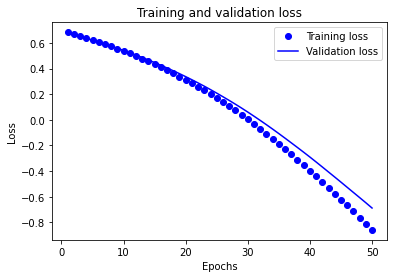

In [189]:
# 正解率と損失の時系列グラフを描く
# model.fit() は、訓練中に発生したすべてのことを記録した辞書を含むHistory オブジェクトを返します。
history_dict = history.history
history_dict.keys()

# グラフ用に変数化（辞書から呼びだす）
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# x軸用
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

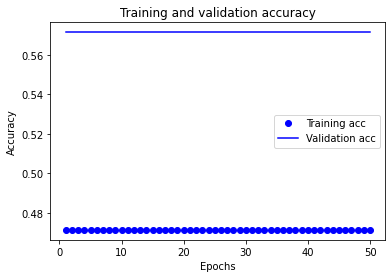

In [190]:
plt.clf()   # 図のクリア

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##【問題4】Iris（多値分類）をKerasで学習

In [191]:
# 多値分類のデータ用意
d_2 = pd.concat([x_df, y_df], axis=1)
d_2.columns=['sepal_length', 'sepal_width', 'petal_length','petal_width','Species']

# 二値分類へ
# d = d[(d["Species"] == 1)|(d["Species"] == 2)].reset_index(drop=True)
# display(d.shape)
# display(d_2.shape)(150, 5)

y_2 = d_2["Species"]
x_2 = d_2.loc[:, ['sepal_length', 'sepal_width', 'petal_length','petal_width']]

x_train, x_test, y_train, y_test = train_test_split(x_2.to_numpy(), y_2.to_numpy(), test_size=0.3, random_state=42)
_, x_val, _, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 4)           600       
_________________________________________________________________
global_average_pooling1d_10  (None, 4)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 697
Trainable params: 697
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
3/3 [==============================] - 1s 87ms/step - loss: 0.6929 - accuracy: 0.3524 - val_loss: 0.6883 - val_accuracy: 0.3438
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 0.6862 - accuracy: 0.3524 - val_loss: 0.682

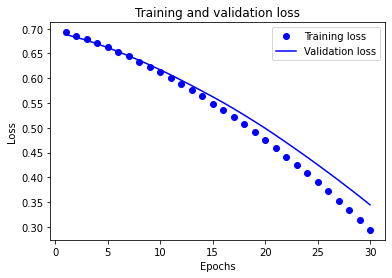

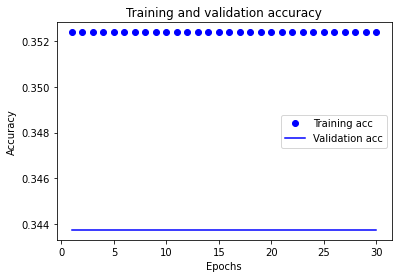

In [192]:
# 問題3の二値分類から多値分類へ変更
model = keras.Sequential()
model.add(keras.layers.Embedding(150, 4))#150行,4列を想定（正しい入力について要チェック）
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='softmax'))
model.summary()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=40,
                    validation_data=(x_val, y_val),
                    verbose=1)

results = model.evaluate(x_test, y_test, verbose=2)
print(results)

history_dict = history.history
history_dict.keys()

# グラフ用に変数化（辞書から呼びだす）
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# x軸用
epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()   # 図のクリア
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 【問題5】House PricesをKerasで学習

In [256]:
df = pd.read_csv("train.csv")

y = df["SalePrice"]
X = df.loc[:, ["GrLivArea", "YearBuilt"]]

df_3 = pd.concat([x, y], axis=1)

# y = np.array(y)
# X = np.array(X)
# y = y.astype(np.int)[:, np.newaxis]
# y = np.log(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# _, X_val, _, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [257]:
train_stats = df_3.describe()
train_stats = train_stats.transpose()

print(train_stats.shape)
print(X.shape)
print(y.shape)
# 正規化
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']

# normed_train_data = norm(df_3.loc[:, ["GrLivArea", "YearBuilt"]])
# normed_test_data = norm(df["SalePrice"])

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model



(5, 8)
(1460, 2)
(1460,)


In [258]:
model = build_model()
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 64)                192       
_________________________________________________________________
dense_46 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 65        
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [259]:
# example_batch = x_train[:10]
example_result = model.predict(X_train)
example_result

array([[318.4725 ],
       [372.62958],
       [355.19305],
       ...,
       [306.14566],
       [325.68823],
       [315.56744]], dtype=float32)

In [260]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................

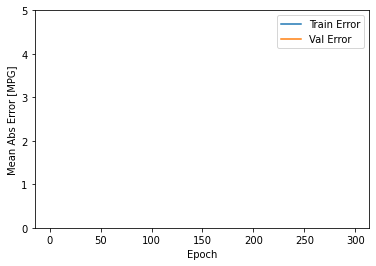

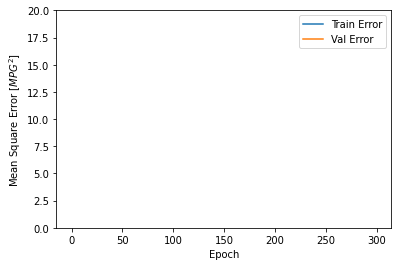

In [266]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

# histryの辞書を入れたらグラフが返ってくる
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

## 【問題6】MNISTをKerasで学習

In [267]:
from keras.datasets import mnist

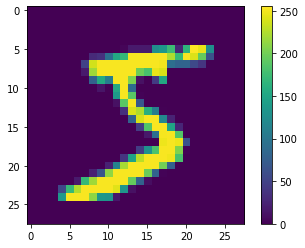

In [287]:
# 読み込み
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# 0~1のスケールへ変換
train_images = train_images / 255.0
test_images = test_images / 255.0

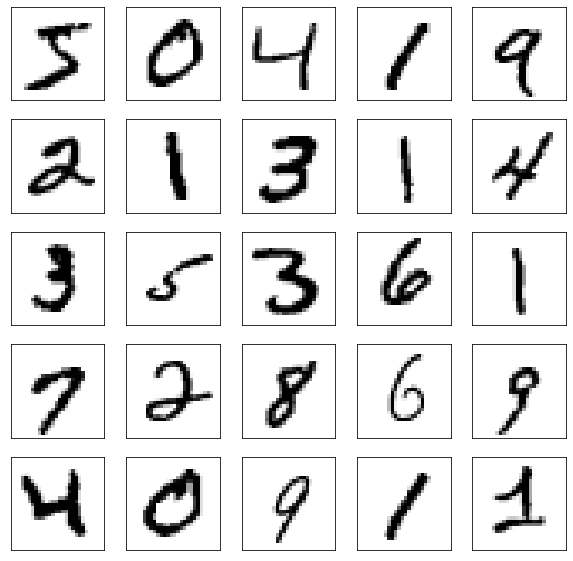

In [289]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
plt.show()

In [292]:
# モデルの構築
m_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
# モデルのコンパイル
m_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# モデルの訓練
m_model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7866 - accuracy: 0.8602
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4193 - accuracy: 0.9069
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2993 - accuracy: 0.9260
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9356
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2352 - accuracy: 0.9407


In [294]:
# 正解率の評価
test_loss, test_acc = m_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2616 - accuracy: 0.9335

Test accuracy: 0.9334999918937683


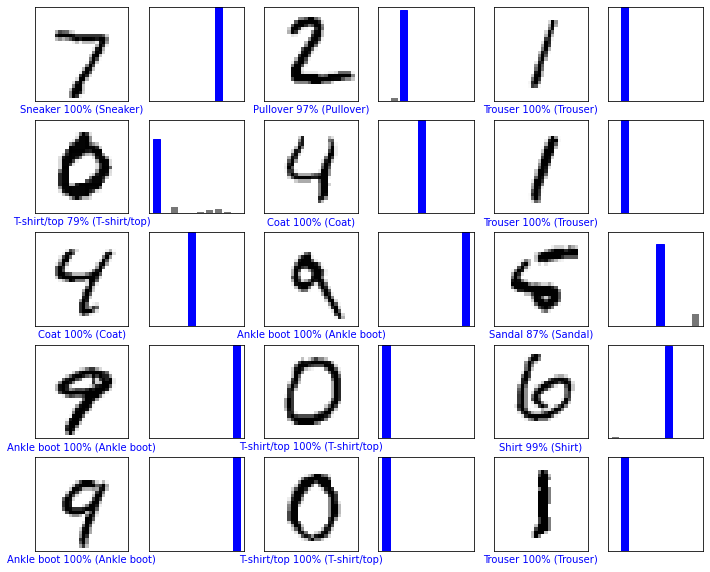

In [301]:
# 予測する
predictions = m_model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[1.70839191e-21 1.17496681e-12 1.24633308e-08 3.35719051e-07
  1.06073606e-14 8.61359922e-07 1.85597665e-22 9.99998808e-01
  9.66723143e-12 4.14362979e-08]]


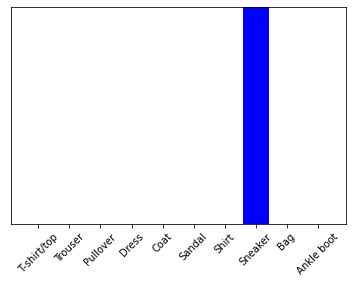

In [298]:
img = test_images[0]

print(img.shape)


# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img,0))

print(img.shape)


predictions_single = m_model.predict(img)

print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)